In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
import yfinance as yf
plt.style.use('fivethirtyeight')

In [ ]:
stock = 'HDFCBANK.NS'
start = '2012-01-01'
end = date.today().isoformat()

data = yf.download(stock, start ,end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,214.449997,214.899994,209.750000,213.425003,195.259415,3514998
2012-01-03,215.699997,220.449997,215.000000,219.574997,200.885925,3439238
2012-01-04,220.949997,222.475006,215.425003,221.649994,202.784317,4871478
2012-01-05,222.000000,223.350006,220.149994,221.824997,202.944427,3380606
2012-01-06,220.500000,228.574997,219.475006,226.649994,207.358749,3977222
...,...,...,...,...,...,...
2024-02-05,1446.000000,1451.900024,1434.050049,1444.849976,1444.849976,19302523
2024-02-06,1445.550049,1449.699951,1432.599976,1444.099976,1444.099976,20537870
2024-02-07,1453.000000,1453.800049,1426.650024,1429.949951,1429.949951,27418543


In [ ]:
close_col = data.filter(['Close'])
dataset = close_col.values

n = math.ceil(len(dataset)*0.8)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00406001],
       [0.00542984],
       ...,
       [0.80310607],
       [0.78534772],
       [0.78571076]])

In [ ]:
train_data = scaled_data[0 : n, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.00406001, 0.00542984, 0.00554537, 0.00873066,
       0.00952287, 0.0108432 , 0.01181693, 0.01313726, 0.01411101,
       0.01110726, 0.0137149 , 0.01817101, 0.01978841, 0.02102622,
       0.01886419, 0.02044858, 0.0209107 , 0.01893021, 0.01723028,
       0.02153785, 0.02320476, 0.02345232, 0.02620851, 0.02668713,
       0.02721526, 0.0269347 , 0.03158884, 0.02992193, 0.0313908 ,
       0.03005398, 0.03505471, 0.03287617, 0.03348682, 0.03472462,
       0.03452658, 0.03508773, 0.03228203, 0.02929477, 0.034213  ,
       0.02978989, 0.02876665, 0.03033454, 0.0277599 , 0.0265881 ,
       0.02931129, 0.03180341, 0.03040056, 0.03219951, 0.03345382,
       0.02771038, 0.02673664, 0.02376591, 0.02592794, 0.02931129,
       0.02554835, 0.02875015, 0.02799095, 0.03036754, 0.02858511])]
[0.027479329554306348]

[array([0.        , 0.00406001, 0.00542984, 0.00554537, 0.00873066,
       0.00952287, 0.0108432 , 0.01181693, 0.01313726, 0.01411101,
       0.01110726, 0.0137149 , 0.0

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape, y_train.shape


((2330, 60, 1), (2330,))

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

2330/2330 [==============================] - 78s 32ms/step - loss: 0.0011


In [ ]:
test_data = scaled_data[n - 60: , :]
x_test = []
y_test = dataset[n:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 [==============================] - 1s 16ms/step


In [ ]:
from sklearn.metrics import r2_score

rmse = np.sqrt( np.mean( predictions - y_test )**2 )
r_squared = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("R-squared:", r_squared)

RMSE: 13.938156153488798
R-squared: 0.8668074056684516


<ipython-input-146-d5ff2d27e999>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


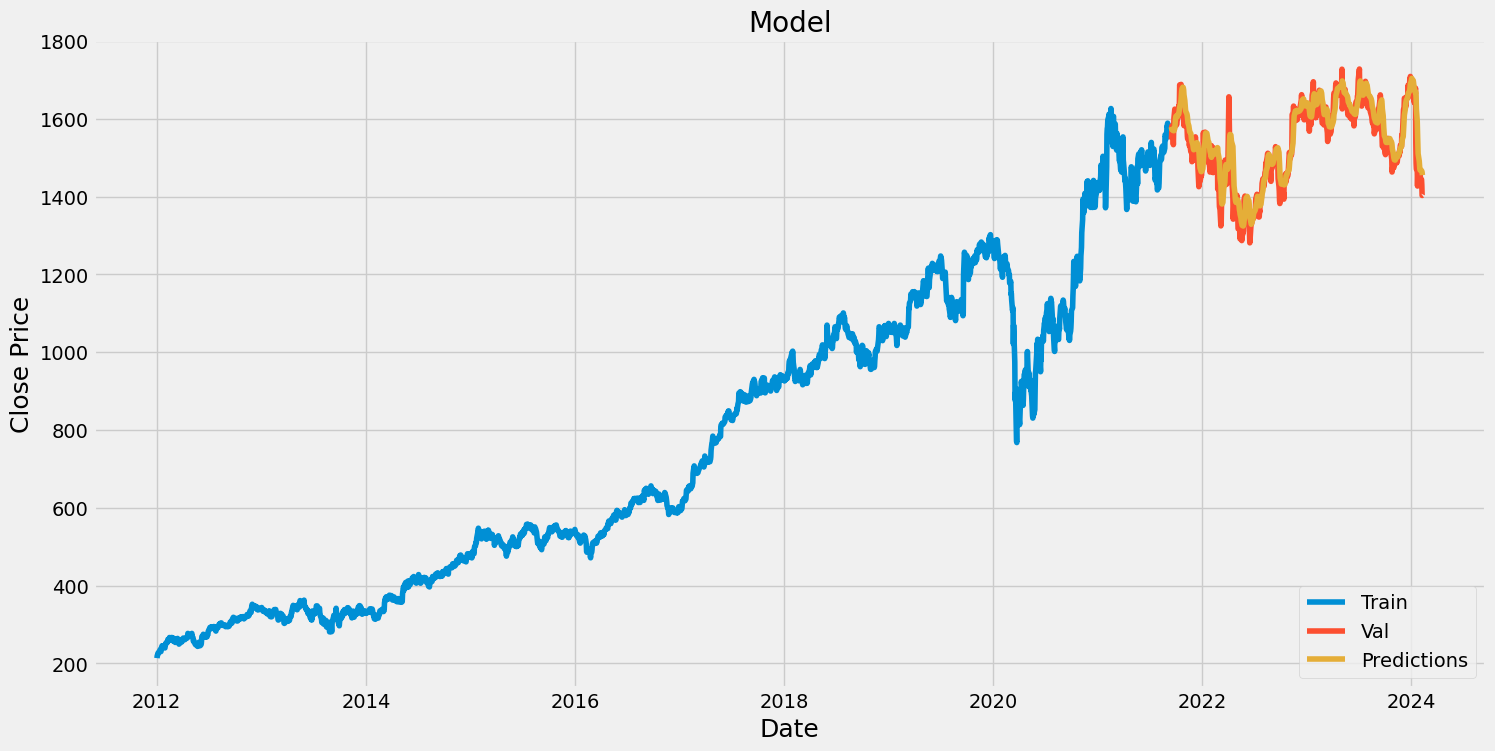

In [ ]:
train = close_col[:n]
valid = close_col[n:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2021-09-15,1546.800049,1579.048950
2021-09-16,1559.949951,1574.461426
2021-09-17,1582.150024,1572.091187
2021-09-20,1559.849976,1574.006714
2021-09-21,1551.949951,1574.580444
...,...,...
2024-02-05,1444.849976,1467.901733
2024-02-06,1444.099976,1466.819092
2024-02-07,1429.949951,1465.563232


In [ ]:
stock1 = 'HDFCBANK.NS'
start1 = '2014-01-01'
end1 = '2024-02-05'

data1 = yf.download(stock1, start1 ,end1)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
close_col1 = data1.filter(['Close'])
data1 = close_col1
last_60 = data1[-60:].values
last_60_scaled = scaler.transform(last_60)

X_test = []
X_test.append(last_60_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 0s 33ms/step
[[1467.9017]]
